In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import seaborn as sns
data_set=pd.read_csv("cancer_dataset.csv")

In [34]:
data_set

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [35]:
selected_data=data_set.loc[:,["Age","Gender","Air Pollution","Alcohol use","Dust Allergy","chronic Lung Disease","Shortness of Breath"]]

In [36]:
selected_data.isna().sum()

Age                     0
Gender                  0
Air Pollution           0
Alcohol use             0
Dust Allergy            0
chronic Lung Disease    0
Shortness of Breath     0
dtype: int64

In [37]:
training_x_data=selected_data.loc[:900]

In [38]:
training_x_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Shortness of Breath
0,33,1,2,4,5,2,2
1,17,1,3,1,5,2,7
2,35,1,4,5,6,4,9
3,37,1,7,7,7,7,3
4,46,1,6,8,7,6,4
...,...,...,...,...,...,...,...
896,35,1,4,5,6,5,3
897,27,1,2,3,4,3,4
898,48,1,6,7,7,6,2
899,64,1,6,8,7,6,5


In [39]:
training_y_data=data_set.loc[:900,["Level"]]

In [40]:
training_y_data

,Level
0,Low
1,Medium
2,High
3,High
4,High
...,...
896,Medium
897,Medium
898,High
899,High


In [41]:
label_encoder=preprocessing.LabelEncoder()

In [42]:
training_y_data.Level=label_encoder.fit_transform(training_y_data.Level)

In [43]:
training_y_data.values.flatten()

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [44]:
training_y_data.shape

(901, 1)

In [45]:
test_x_data=selected_data.loc[901:]

In [46]:
test_x_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Shortness of Breath
901,37,2,7,7,7,7,3
902,27,2,3,1,4,2,3
903,73,1,5,6,6,5,6
904,17,1,3,1,5,2,7
905,34,1,6,7,7,7,3
...,...,...,...,...,...,...,...
995,44,1,6,7,7,6,2
996,37,2,6,8,7,6,5
997,25,2,4,5,6,4,9
998,18,2,6,8,7,6,4


In [47]:
test_y_data=data_set.loc[901:,["Level"]]

In [48]:
test_y_data.Level=label_encoder.fit_transform(test_y_data.Level)

In [49]:
test_y_data

,Level
901,0
902,1
903,2
904,2
905,0
...,...
995,0
996,0
997,0
998,0


In [50]:
model=LogisticRegression(max_iter=1000)

In [51]:
training_x_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Shortness of Breath
0,33,1,2,4,5,2,2
1,17,1,3,1,5,2,7
2,35,1,4,5,6,4,9
3,37,1,7,7,7,7,3
4,46,1,6,8,7,6,4
...,...,...,...,...,...,...,...
896,35,1,4,5,6,5,3
897,27,1,2,3,4,3,4
898,48,1,6,7,7,6,2
899,64,1,6,8,7,6,5


In [52]:
test_x_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Shortness of Breath
901,37,2,7,7,7,7,3
902,27,2,3,1,4,2,3
903,73,1,5,6,6,5,6
904,17,1,3,1,5,2,7
905,34,1,6,7,7,7,3
...,...,...,...,...,...,...,...
995,44,1,6,7,7,6,2
996,37,2,6,8,7,6,5
997,25,2,4,5,6,4,9
998,18,2,6,8,7,6,4


In [53]:
training_y_data=np.array(training_y_data).ravel()

In [54]:
model.fit(training_x_data,training_y_data)

LogisticRegression(max_iter=1000)

In [55]:

predicted_data=model.predict(test_x_data)

In [56]:
predicted_data=predicted_data.flatten()

In [57]:
output=pd.DataFrame({
    "Actual Level":test_y_data.Level,
    "Predicted level":predicted_data

})

In [58]:
output

,Actual Level,Predicted level
901,0,0
902,1,1
903,2,2
904,2,2
905,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [59]:
output["error"]=output["Actual Level"]-output["Predicted level"]

In [60]:
output["squaredErr"]=output["error"]**2
output["RMSE"]=np.sqrt(output["squaredErr"])

In [61]:
overallrmse=np.sqrt(output["squaredErr"].mean())
print(overallrmse)

0.7035264706814485


In [62]:
output.to_csv("Predicted Lung Cancer.csv",index=False)

In [63]:
import matplotlib.pyplot as plt

In [64]:
output

,Actual Level,Predicted level,error,squaredErr,RMSE
901,0,0,0,0,0.0
902,1,1,0,0,0.0
903,2,2,0,0,0.0
904,2,2,0,0,0.0
905,0,0,0,0,0.0
...,...,...,...,...,...
995,0,0,0,0,0.0
996,0,0,0,0,0.0
997,0,0,0,0,0.0
998,0,0,0,0,0.0


In [65]:
output["index"]=data_set.loc[901:,"index"]

In [66]:
output

,Actual Level,Predicted level,error,squaredErr,RMSE,index
901,0,0,0,0,0.0,901
902,1,1,0,0,0.0,902
903,2,2,0,0,0.0,903
904,2,2,0,0,0.0,904
905,0,0,0,0,0.0,905
...,...,...,...,...,...,...
995,0,0,0,0,0.0,995
996,0,0,0,0,0.0,996
997,0,0,0,0,0.0,997
998,0,0,0,0,0.0,998


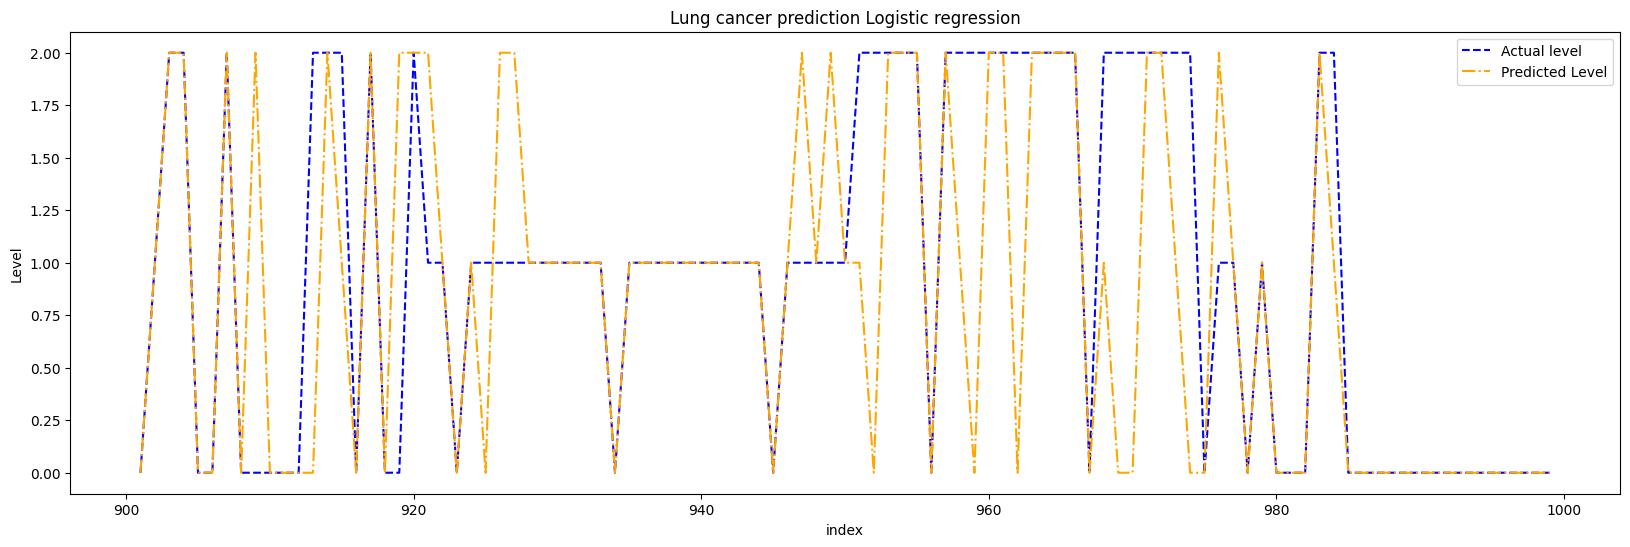

In [71]:
plt.figure(figsize=(20, 6))
sns.lineplot(output,x="index",y="Actual Level",label="Actual level",color='blue',linestyle='--')
sns.lineplot(output,x="index",y="Predicted level",label="Predicted Level",color='orange',linestyle='-.')
plt.title("Lung cancer prediction Logistic regression")
plt.ylabel("Level")
plt.show()